In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2021-05-09 03:59:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.199.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2021-05-09 03:59:14 (214 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [3]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [5]:
training_size = 20000
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [7]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=100, padding='post', truncating='post')

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=100, padding='post', truncating='post')

In [8]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(10000,16,input_length=100))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(25,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                850       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 162,151
Trainable params: 162,151
Non-trainable params: 0
________________________________________________

In [14]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 6s - loss: 0.5966 - accuracy: 0.6586 - val_loss: 0.4476 - val_accuracy: 0.7727
Epoch 2/30
625/625 - 2s - loss: 0.3213 - accuracy: 0.8644 - val_loss: 0.3627 - val_accuracy: 0.8363
Epoch 3/30
625/625 - 2s - loss: 0.2456 - accuracy: 0.9024 - val_loss: 0.3450 - val_accuracy: 0.8547
Epoch 4/30
625/625 - 2s - loss: 0.1972 - accuracy: 0.9225 - val_loss: 0.3610 - val_accuracy: 0.8538
Epoch 5/30
625/625 - 2s - loss: 0.1645 - accuracy: 0.9369 - val_loss: 0.3921 - val_accuracy: 0.8509
Epoch 6/30
625/625 - 2s - loss: 0.1403 - accuracy: 0.9485 - val_loss: 0.4352 - val_accuracy: 0.8442
Epoch 7/30
625/625 - 2s - loss: 0.1265 - accuracy: 0.9546 - val_loss: 0.4575 - val_accuracy: 0.8442
Epoch 8/30
625/625 - 2s - loss: 0.1069 - accuracy: 0.9624 - val_loss: 0.5015 - val_accuracy: 0.8393
Epoch 9/30
625/625 - 2s - loss: 0.0960 - accuracy: 0.9665 - val_loss: 0.5573 - val_accuracy: 0.8311
Epoch 10/30
625/625 - 2s - loss: 0.0855 - accuracy: 0.9705 - val_loss: 0.5680 - val_accuracy: 0.8357

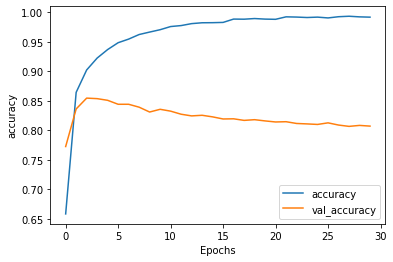

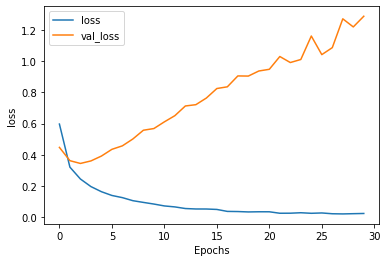

In [15]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [51]:
sentence = ['kindergartener allegedly barred from school because she has two moms']
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')
print(model.predict(padded))

[[5.5622705e-13]]
